### Project - Programming for Data Analysis
For this project I have created a data set by simulating a real-world phenomenon - funding applications for SFI grants in Ireland. I investigated a data set that was available on data.gov.ie to see the relationships between variables in the dataset.  I used this information to simulate a data set based on the existing data set. This was done by modelling and synthesising the data using Python, using the numpy.random package. <br>
<br>
The project requirements ask the user to choose a real-world phenomenon that can be measured and with at least one-hundred data points across at least four different variables. Additional requirements include <br>
• Investigate the types of variables involved, their likely distributions, and their relationships with each other. <br>
• Synthesise/simulate a data set as closely matching their properties as possible. <br>
• Detail the research and implement the simulation in a Jupyter notebook - the data set itself can simply be displayed in an output cell within the notebook. <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from information from stackoverflow https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
url="http://www.sfi.ie/about-us/women-in-science/gender/SFIGenderDashboard_TableauPublic_2019.csv"
df=pd.read_csv(url)
df


,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount funded
0,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,480000.0,NaN
1,SFI Investigator Programme / Principal Investi...,2014,Declined,Female,790000.0,NaN
2,SFI Investigator Project Award,2012,Declined,Female,200000.0,NaN
3,SFI Starting Investigator Research Grant,2018,Declined,Female,400000.0,NaN
4,SFI Investigator Programme / Principal Investi...,2013,Declined,Male,580000.0,NaN
...,...,...,...,...,...,...
2773,SFI Research Centres,2012,Declined,Male,13650000.0,NaN
2774,SFI Investigator Programme / Principal Investi...,2016,Declined,Male,1090000.0,NaN
2775,SFI Investigator Programme / Principal Investi...,2016,Awarded,Male,2000000.0,2000000.0
2776,SFI Industry Fellowship,2016,Awarded,Female,60000.0,50000.0


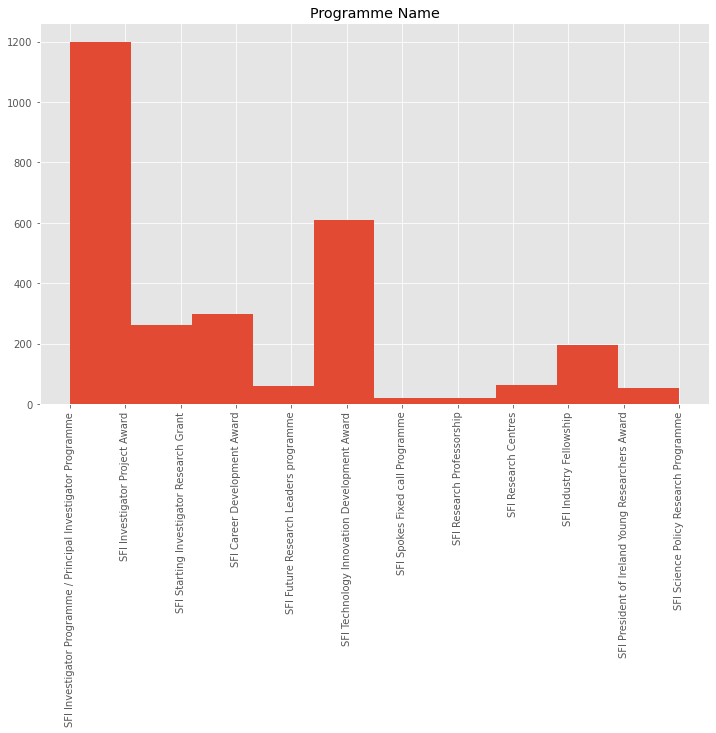

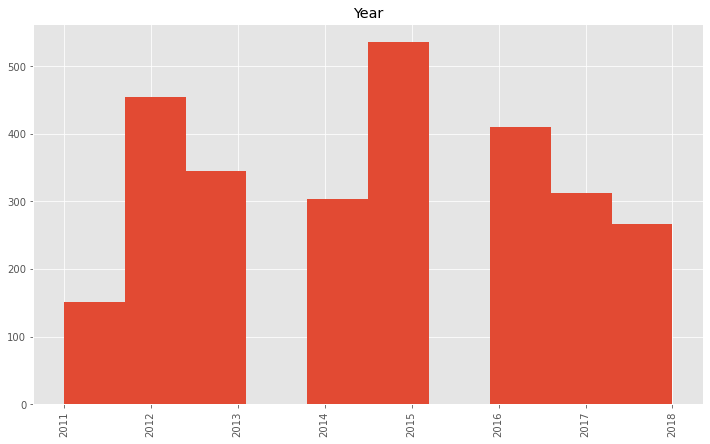

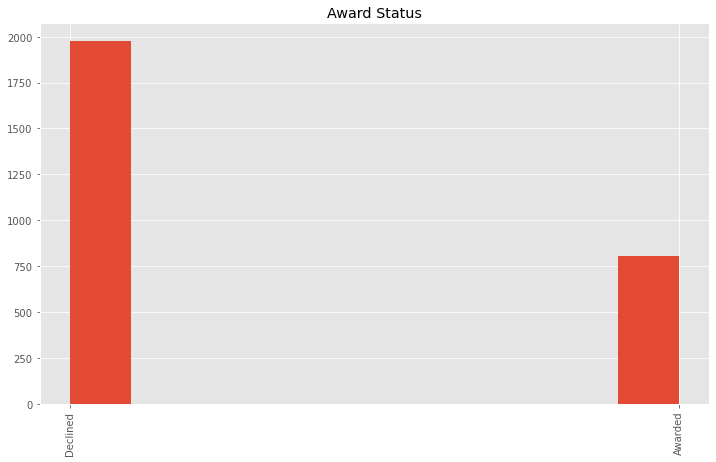

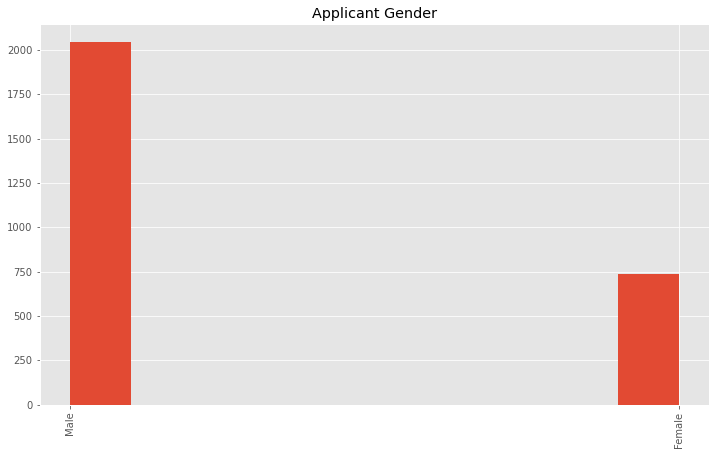

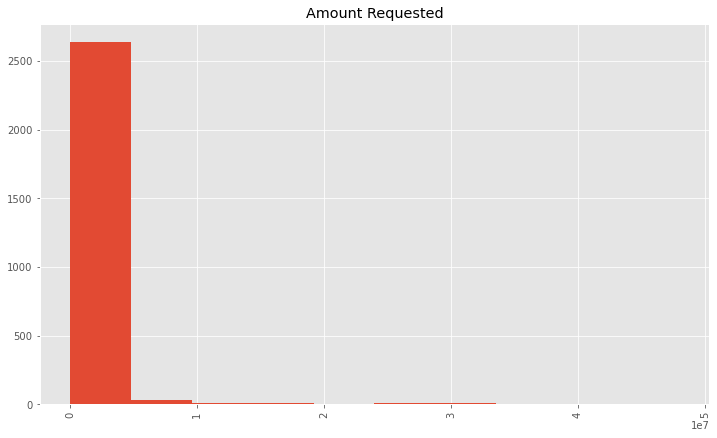

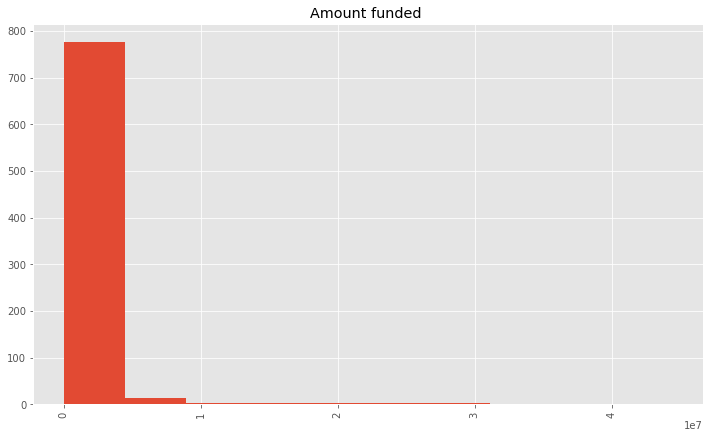

In [3]:
# the for loop will iterate through and develop histograms for each column as defined by the dataframe above
# this will help us to understand the distribution of each variable
# use nicer and bigger plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(12,7)

for col_name in df.columns[0:6]:
    # create a histogram for each of the variables
    plt.hist(df[col_name])
    plt.title(col_name)
    # rotate the information on the x axis to aid reader 
    # from https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
    plt.xticks(rotation=90)
    plt.yticks()
    plt.show()

***
The histograms above indicate, as expected, there is binomial distributions for both the _Award Status_ and _Gender_.  The distribution of the _Programme Name_ resembles a right skewed distribution with a larger proportion of awards sought for _SFI Investigator Programme/Principal Investigator Programme_. The Year variable appears to present with a normal distribution.  The amounts requested and funded need further investigation - the presence of missing data is likely influencing their distribution, but there is a considerable range in values here.  <br>
Further investigations of the data below indicate that there is a difference in the proportion of awarded versus declined applications as well as differences between male and female applicants.

The breakdown of programmes is {'SFI Investigator Programme / Principal Investigator Programme': 926, 'SFI Investigator Project Award': 274, 'SFI Starting Investigator Research Grant': 262, 'SFI Career Development Award': 299, 'SFI Future Research Leaders programme': 59, 'SFI Technology Innovation Development Award': 609, 'SFI Spokes Fixed call Programme': 19, 'SFI Research Professorship': 19, 'SFI Research Centres': 64, 'SFI Industry Fellowship': 195, 'SFI President of Ireland Young Researchers Award': 35, 'SFI Science Policy Research Programme': 17}
The breakdown of overall award status is {'Declined': 1974, 'Awarded': 804}
The breakdown of overall gender is {'Male': 2043, 'Female': 735}
The amount requested is {480000.0: 27, 790000.0: 14, 200000.0: 20, 400000.0: 117, 580000.0: 5, 440000.0: 15, 290000.0: 13, 420000.0: 95, 1200000.0: 14, 750000.0: 20, nan: 1, 70000.0: 57, 980000.0: 16, 1180000.0: 6, 1190000.0: 6, 340000.0: 7, 100000.0: 434, 540000.0: 7, 950000.0: 15, nan: 1, 460000.0:

(array([221.,  19.,   7.,  11.,   4.,  11.,   9.,   0.,   0.,   2.]),
 array([       0.,  4794000.,  9588000., 14382000., 19176000., 23970000.,
        28764000., 33558000., 38352000., 43146000., 47940000.]),
 <BarContainer object of 10 artists>)

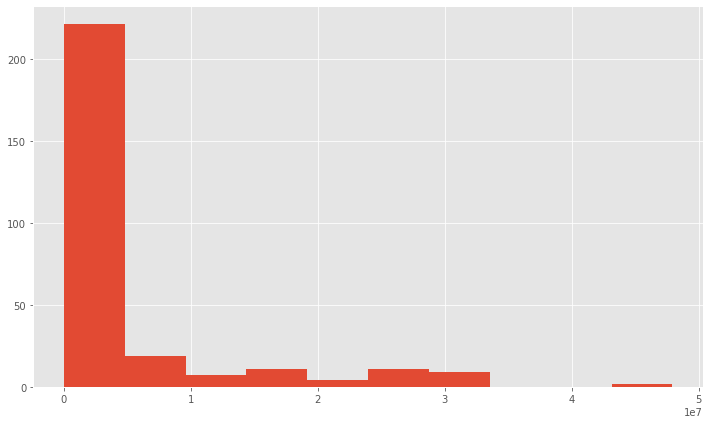

In [4]:
# this count function was created for the Assignment for Fundamentals of Data Analysis
def count(y):
    # create a dictionary which will use input as keys and the number of times each item appears in the input list as the values
    d = {}
    for i in y:
         # using .get method returns the value for the given key, if present in the dictionary 
         #If not, then it will return none [2, 3].
        d[i] = d.get(i, 0) + 1
    return d

# now to look at the number of items in each of the columns 
prog_name = df["Programme Name"]
award_status = df["Award Status"]
gender = df["Applicant Gender"]
amount_req = df["Amount Requested"]

# now we call the function
print("The breakdown of programmes is", count(prog_name))
print("The breakdown of overall award status is", count(award_status))
print("The breakdown of overall gender is", count(gender))
print("The amount requested is", count(amount_req))
plt.hist(count(amount_req))


In [6]:
declined = 1974
awarded = 804
male = 2043
female = 735
total_applicants = 2778
Percentage_awarded = (awarded/total_applicants * 100)
Percentage_female = (male/total_applicants * 100)
print("The percentage of applicants that were successful", Percentage_awarded)
print("The percentage of male applicants is", Percentage_female)

The percentage of applicants that were successful 28.94168466522678
The percentage of male applicants is 73.54211663066955


***
So we can see that there are differences in t

In [7]:
df.describe()


,Year,Amount Requested,Amount funded
count,2778.000000,2.719000e+03,8.050000e+02
mean,2014.595392,1.013064e+06,9.535068e+05
std,2.060589,3.243045e+06,3.311285e+06
min,2011.000000,0.000000e+00,0.000000e+00
25%,2013.000000,1.000000e+05,9.000000e+04
50%,2015.000000,4.200000e+05,2.400000e+05
75%,2016.000000,8.700000e+05,7.000000e+05
max,2018.000000,4.794000e+07,4.444000e+07


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


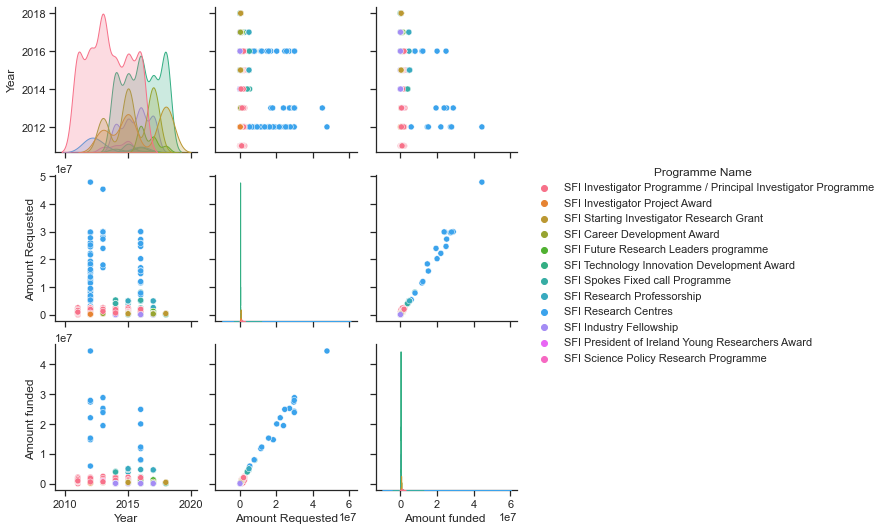

In [8]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Programme Name")
plt.show()

***
## Removing missing data

In [9]:
# as there are a number of rows with missing data in the Amount Requested column I can remove these 
# using guidance from https://machinelearningmastery.com/handle-missing-data-python/
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# drop rows with missing values in the column "Award Requested"
#df.dropna(subset=['Amount Requested'])


In [10]:
# now to look at the number of items in each of the columns 
#my_list = df["Amount Requested"]

# now we call the function
#count(my_list)

***
## Generating a data set
Using the numpy.random package I create the 6 variables that reflect the original data set but are simulated using the RNG function in numpy [ref].
Instead of generating text data I have generated numeric data which can be reformatted at the final stage.??
Using a For Loop to create a dictionary with each of the 6 variables which will act as keys and a unique value being generated for each key in the dictionary and then these can be added to the simulated data set

In [11]:
# using default_rng() will get a new instance of a Generator with the default BitGenerator (PCG64).
rng = np.random.default_rng()


# creating a dictionary with each variable as a key and a method of establishing the value using numpy.random
# each key is explained below
def sim_record():
    # 
    prog = "SFI investigator"
    # any year between 2011 up to but not including 2019
    year = rng.integers(2011, 2019)
    # based on the original data, the probability of the application being successful is 0.29
    status = rng.binomial(1, 0.29)
    if status == 1:
        status = "Awarded"
    else:
        status = "Declined"
    # based on the original data, the probability of the applicant being male is 0.74
    gender = rng.binomial(1, 0.74)
    if gender == 1:
        gender = "male"
    else:
        gender = "female"
    # based on the original data, the amount requested varied from 0 to 4794000    
    req = rng.integers(0, 100000)
    # this will be 0 if status is Declined and should resemble requested amount if Awarded (with variation) 
    funded = 0
    # create a dictionary which acts as a new simulated record for an individual entry in the new data set
    new_data = {"Programme_Name":prog,"Year":year ,"Award_Status":status ,"Applicant_Gender":gender ,"Amount_Requested":req , "Amount_funded":funded }
    return new_data

print(sim_record())    

{'Programme_Name': 'SFI investigator', 'Year': 2012, 'Award_Status': 'Awarded', 'Applicant_Gender': 'male', 'Amount_Requested': 97464, 'Amount_funded': 0}


In [12]:
for i in range(1000):
    print(sim_record())

{'Programme_Name': 'SFI investigator', 'Year': 2016, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 29038, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2016, 'Award_Status': 'Declined', 'Applicant_Gender': 'female', 'Amount_Requested': 83094, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2014, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 90818, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2011, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 13829, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2011, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 6848, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2016, 'Award_Status': 'Awarded', 'Applicant_Gender': 'male', 'Amount_Requested': 57739, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2014, 'Award_Stat

{'Programme_Name': 'SFI investigator', 'Year': 2018, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 33640, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2015, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 50705, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2013, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 96814, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2014, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 55828, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2016, 'Award_Status': 'Declined', 'Applicant_Gender': 'female', 'Amount_Requested': 16155, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2016, 'Award_Status': 'Declined', 'Applicant_Gender': 'male', 'Amount_Requested': 95321, 'Amount_funded': 0}
{'Programme_Name': 'SFI investigator', 'Year': 2011, 'Award_St

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
awarded =        df[df["Award Status"] == "Awarded"]
awarded_gender = awarded[awarded["Applicant Gender"] == "Male"]
awarded_gender

,Programme Name,Year,Award Status,Applicant Gender,Amount Requested,Amount funded
9,SFI Investigator Programme / Principal Investi...,2013,Awarded,Male,1200000.0,1060000.0
10,SFI Investigator Programme / Principal Investi...,2011,Awarded,Male,750000.0,770000.0
17,SFI Technology Innovation Development Award,2018,Awarded,Male,100000.0,100000.0
18,SFI Investigator Programme / Principal Investi...,2016,Awarded,Male,1200000.0,1200000.0
24,SFI Technology Innovation Development Award,2017,Awarded,Male,100000.0,100000.0
...,...,...,...,...,...,...
2758,SFI Career Development Award,2015,Awarded,Male,490000.0,490000.0
2761,SFI Industry Fellowship,2017,Awarded,Male,50000.0,50000.0
2763,SFI Industry Fellowship,2014,Awarded,Male,110000.0,90000.0
2767,SFI Starting Investigator Research Grant,2015,Awarded,Male,400000.0,390000.0


In [15]:
male_applicants = df[df["Applicant Gender"] == "Male"]
male_applicants.describe()

,Year,Amount Requested,Amount funded
count,2043.000000,2.000000e+03,5.920000e+02
mean,2014.486050,1.156305e+06,1.100039e+06
std,2.046515,3.634810e+06,3.693443e+06
min,2011.000000,0.000000e+00,0.000000e+00
25%,2013.000000,1.000000e+05,9.000000e+04
50%,2015.000000,4.300000e+05,3.100000e+05
75%,2016.000000,9.500000e+05,8.625000e+05
max,2018.000000,4.794000e+07,4.444000e+07


In [16]:
male_successful = df[]

SyntaxError: invalid syntax (<ipython-input-16-585c0d784916>, line 1)

In [ ]:
#awarded.hist(by="Applicant Gender")
#awarded_gender.hist(by="Programme Name")
df.hist(by="Applicant Gender")

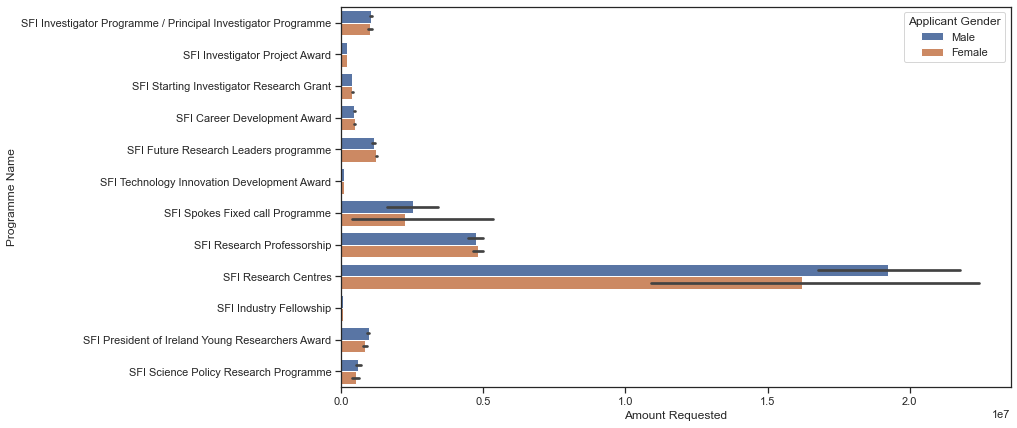

In [24]:
ax = sns.barplot(x="Amount Requested", y="Programme Name", hue="Applicant Gender", data=df)